In [1]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 

mlp.style.use('fast')

[1.94145171 1.90545564 2.07209175 2.07590106 2.06158155 2.04146811]
[2.80643772 2.71026093 2.74954744 2.73472694]
[3.79725722 3.92126518]


Text(0.5, 1.0, 'error = $O(\\tau+h^{p+1})$  $\\tau=Ch^{p+1},\\  C=0.5$')

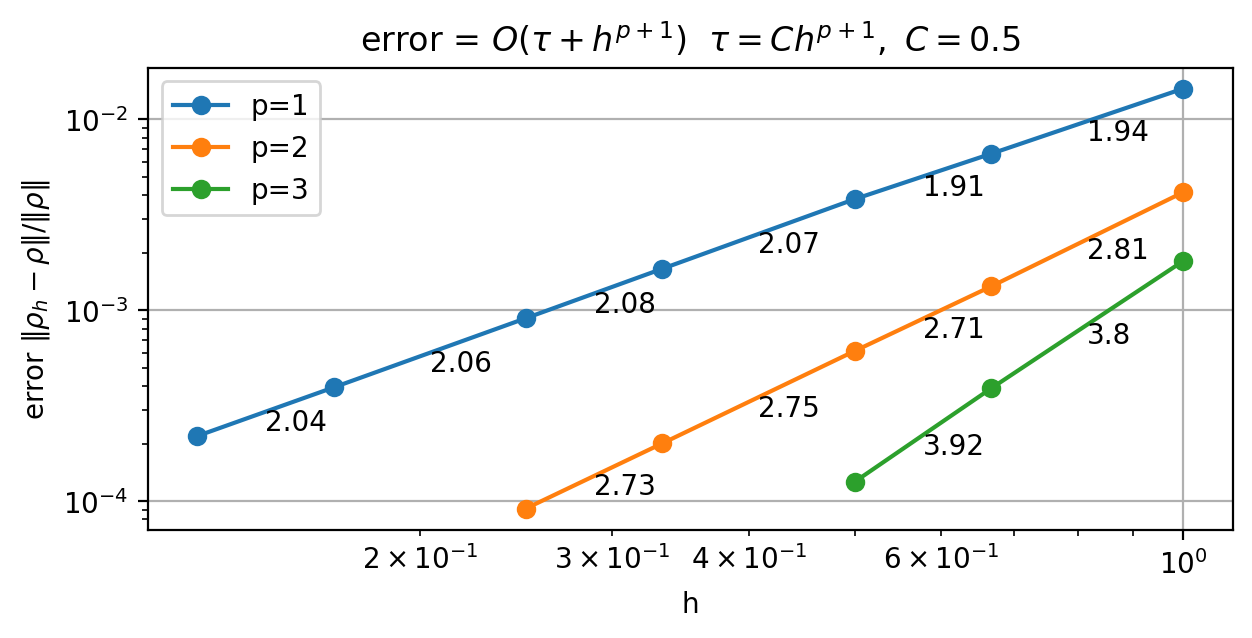

In [7]:
plt.figure(figsize=(7,3),dpi=200)
for p in [1,2,3]:
    NN = [10,15,20,30,40,60,80]
    err = []
    if p>1:
        NN = NN[:-(2*p-2)]
    for N in NN:
        data = np.loadtxt('./logging_%d_%d_3'%(p,N))
        data = data[1]
        err.append(data)
        # print(p,N,data)
    h = 10/np.array(NN)
    e = np.array(err)
    o = np.diff(np.log(e))/np.diff(np.log(h))
    print(o)
    plt.loglog(h,e,'o-',label='p=%d'%p)
    for x,y,z in zip((h[:-1]*h[1:])**0.5,(e[:-1]*e[1:])**0.5,o):
        plt.text(x,y*0.8,np.round(z,2))
    plt.xlabel('h')
    plt.ylabel(r'error $\|\rho_h-\rho\|/\|\rho\|$')
plt.legend()
plt.grid()
plt.title(r'error = $O(\tau+h^{p+1})$  $\tau=Ch^{p+1},\  C=0.5$')

In [ ]:
!g++ VortexBatch3.cpp -o VortexBatch3 -fopenmp -mfma -mavx2 -O3 -g -I.

In [12]:
p = 2
for N in [10, 20, 40]:
    !./VortexBatch3 {p} {N} > logging_{p}_{N}

Start   0.000000
Time  0.001222  	sec      Split Hex Mesh to Tet
Time  0.008586  	sec      Set Init Value
Time  0.622990  	sec      Picard iter 0  0.944279
Time  1.441819  	sec      Picard iter 1  0.199843
Time  1.877395  	sec      Picard iter 2  0.0655836
Time  2.344090  	sec      Picard iter 3  0.0306061
Time  3.072515  	sec      Picard iter 4  0.0117529
Time  3.488729  	sec      Picard iter 5  0.00572319
Time  4.102502  	sec      Picard iter 6  0.00253786
Time  4.537200  	sec      Picard iter 7  0.00128143
Time  5.188184  	sec      Picard iter 8  0.000637164
Time  6.024281  	sec      Picard iter 9  0.000328533
Time  6.420804  	sec      Picard iter 10  0.000172188
Time  6.824351  	sec      Picard iter 11  8.94355e-05
^C
Start   0.000000
Time  0.005651  	sec      Split Hex Mesh to Tet
Time  0.056096  	sec      Set Init Value
Time  1.907278  	sec      Picard iter 0  0.194145
Time  3.047866  	sec      Picard iter 1  0.0247704
Time  4.356737  	sec      Picard iter 2  0.00415823
Time  5.4

In [ ]:
p = 2
N = 40
data = np.loadtxt('./Order_%d/rho_T_1_N_%d.txt'%(p,N))
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

plt.figure(dpi=200)
plt.tripcolor(x,y,rh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,10,6))
plt.yticks(np.linspace(0,10,6))
plt.xticks(np.linspace(0,10,11),minor=True)
plt.yticks(np.linspace(0,10,11),minor=True)
plt.grid(which='both')

# PoiseuilleBatch3

In [108]:
!g++ PoiseuilleBatch3.cpp -o PoiseuilleBatch3 -fopenmp -mfma -mavx2 -O3 -g -I.
!./PoiseuilleBatch3 1 5
!./PoiseuilleBatch3 2 5
!./PoiseuilleBatch3 3 5

Start   0.000000
Time  0.000291  	sec      Split Hex Mesh to Tet
Time  0.004721  	sec      Set Init Value
#       time  rel.err  rho    rel.err  u    rel.err  v    rel.err  w    rel.err  e  rel.err coef      cpu time  
Time  0.108316  	sec      Picard iter 0  0.231254
Time  0.195222  	sec      Picard iter 1  0.0940389
Time  0.278828  	sec      Picard iter 2  0.0631487
Time  0.361222  	sec      Picard iter 3  0.0457672
Time  0.443085  	sec      Picard iter 4  0.0350018
Time  0.525238  	sec      Picard iter 5  0.0278975
Time  0.618377  	sec      Picard iter 6  0.0229837
Time  0.705790  	sec      Picard iter 7  0.0194834
Time  0.801130  	sec      Picard iter 8  0.0169534
Time  0.891448  	sec      Picard iter 9  0.0151141
Time  0.986465  	sec      Picard iter 10  0.0137717
Time  1.076397  	sec      Picard iter 11  0.0127836
Time  1.166664  	sec      Picard iter 12  0.0120431
Time  1.256376  	sec      Picard iter 13  0.0114715
Time  1.342168  	sec      Picard iter 14  0.0110128
Time  1.4265

In [54]:
data = np.loadtxt('./12345.txt')
mat = scipy.sparse.csr_matrix((data[:,2],(data[:,0].astype(int),data[:,1].astype(int))))
mat = mat.todense()
# mat.shape,np.linalg.svd(mat).S
np.linalg.cond(mat)

np.float64(1138911.6805311618)

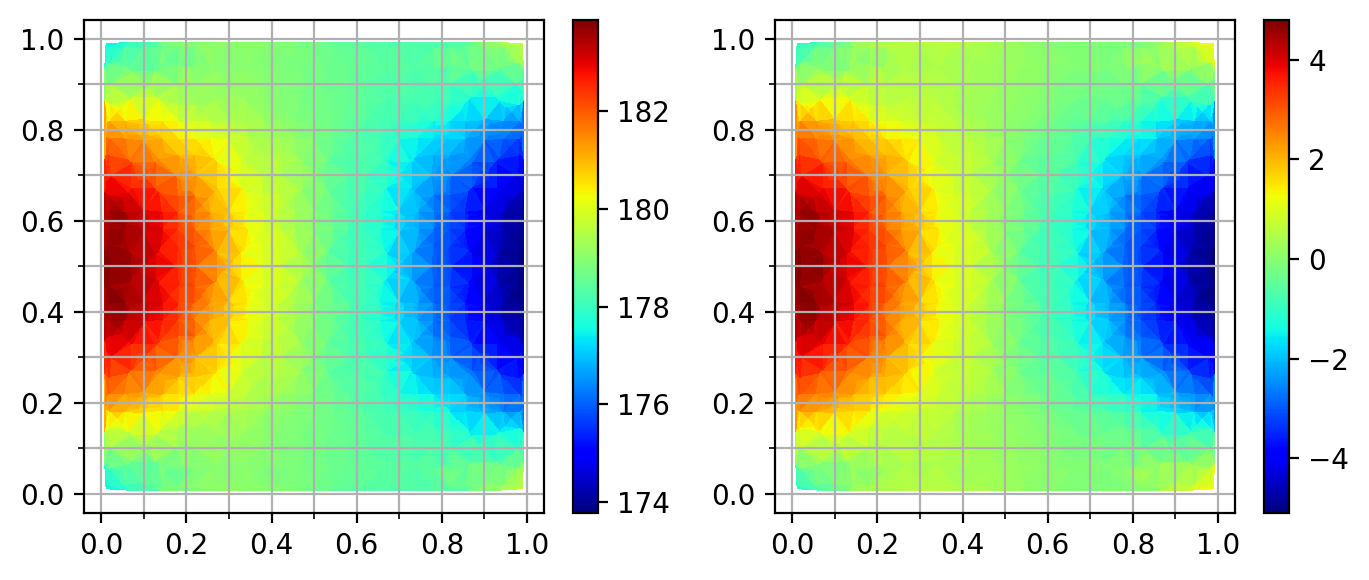

In [67]:
p = 1
N = 5
data = np.loadtxt('./Poiseuille/Order_%d/rho_T_1_N_%d.txt'%(p,N))
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
# x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data[(z>0.2)*(z<0.4)].T

plt.figure(figsize=(7,3),dpi=200)

plt.subplot(1,2,1)
plt.tripcolor(x,y,eh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')

plt.subplot(1,2,2)
plt.tripcolor(x,y,eh-es,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')

plt.tight_layout()
plt.show()

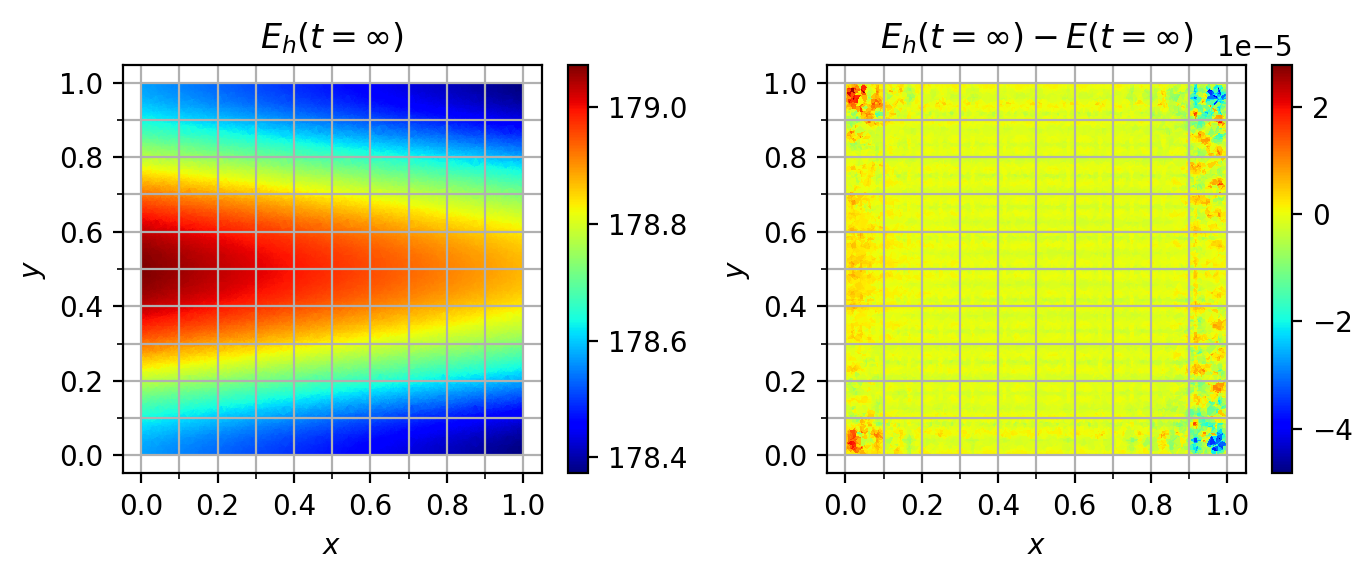

In [13]:
p = 3
N = 12
data = np.loadtxt('./Poiseuille/Order_%d/rho_T_1_N_%d.txt'%(p,N))
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
# x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data[(z>0.2)*(z<0.4)].T

plt.figure(figsize=(7,3),dpi=200)

plt.subplot(1,2,1)
plt.tripcolor(x,y,eh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.tripcolor(x,y,eh-es,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.tight_layout()
plt.show()

In [4]:
!g++ PoiseuilleBatch3.cpp -o PoiseuilleBatch3 -fopenmp -mfma -mavx2 -O3 -g -I.

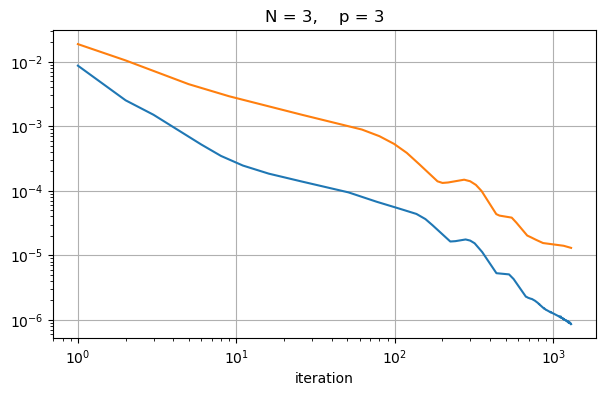

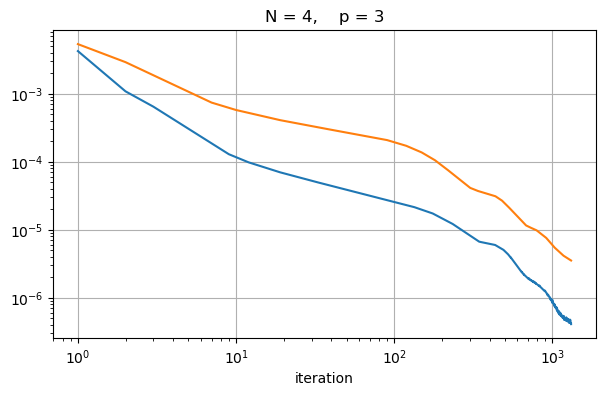


KeyboardInterrupt



In [3]:
import subprocess

for p in [3,4]:
    for N in [3,4,5,6,8,10,12,16,20]:
        # 定义输出文件路径
        stdout_file = f"./Poiseuille/logging_Diric4_{p}_{N}_rel1E3_stdout.txt"
        stderr_file = f"./Poiseuille/logging_Diric4_{p}_{N}_rel1E3_stderr.txt"

        # 构造命令
        command = f"./PoiseuilleBatch3 {p} {N}"

        # 执行命令并捕获输出
        with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
            process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
            process.wait()  # 等待进程完成

        # 如果需要处理 std::cerr 的内容，可以在这里读取 stderr_file
        with open(stderr_file, "r") as err:
            stderr_content = err.read()
            # 在这里对 stderr_content 进行处理
            sss = stderr_content.split('\n')[3:-2]
            results = []
            for line in sss:
                parts = line.strip().split()
                time = float(parts[1])
                iteration = int(parts[-2])
                value = float(parts[-1])
                results.append({
                    'time': time,
                    'iteration': iteration,
                    'value': value
                })

            # 打印结果（可选）
            # for item in results:
            #     print(f"Time: {item['time']} sec, Iteration: {item['iteration']}, Value: {item['value']}")

            iteration = []
            value = []
            for item in results:
                iteration.append(1+item['iteration'])
                value.append(item['value'])

            plt.figure(figsize=(7,4),dpi=100)
            plt.loglog(iteration[0::2],value[0::2],label=r'$\|U^{(k+1)}-U^{(k)}\|$')
            plt.loglog(iteration[1::2],value[1::2],label=r'$\|\mathcal{N}(U^{(k+1)})\|$')
            plt.xlabel(r'iteration')
            # plt.ylabel(r'$\|U^{(k+1)}-U^{(k)}\|$')
            plt.title('N = %d,    p = %d'%(N,p))
            plt.grid()
            plt.show()
            # print(f"Captured stderr for N={N}: {stderr_content}")

In [120]:
p = 1
for N in [3,4,5,6,8,10,12,16,20]:
    !./PoiseuilleBatch3 {p} {N} > ././Poiseuille/logging_Diric4_{p}_{N}_1E_3

Start   0.000000
Time  0.000301  	sec      Split Hex Mesh to Tet
Time  0.005817  	sec      Set Init Value
Time  0.229621  	sec      Picard iter 0  0.44532
Time  0.393192  	sec      Picard iter 1  0.173759
Time  0.558464  	sec      Picard iter 2  0.120438
Time  0.650241  	sec      Picard iter 3  0.0914684
Time  0.761164  	sec      Picard iter 4  0.0720446
Time  0.839325  	sec      Picard iter 5  0.0576349
Time  0.921935  	sec      Picard iter 6  0.0467739
Time  0.988725  	sec      Picard iter 7  0.0389209
Time  1.068784  	sec      Picard iter 8  0.0337233
Time  1.177605  	sec      Picard iter 9  0.0307553
Time  1.278428  	sec      Picard iter 10  0.0294707
Time  1.391490  	sec      Picard iter 11  0.0292982
Time  1.499136  	sec      Picard iter 12  0.0297623
Time  1.551001  	sec      Picard iter 13  0.0305308
Time  1.639738  	sec      Picard iter 14  0.0313979
Time  1.760647  	sec      Picard iter 15  0.0322448
Time  1.813392  	sec      Picard iter 16  0.0330065
Time  1.901246  	sec    

[ 1.65170812  1.93334608  1.483961    1.3995869   0.94873228  0.56039026
  0.32960335 -0.06117851]
[1.74422833 1.69204238 1.90351365 2.90474408 4.03912588 2.90141484
 2.36362003 2.152986  ]
[4.73011139 4.1590678  3.38001301 3.46662863 2.66254617 1.46897702
 1.37121218 0.72461494]


Text(0.5, 1.0, 'error = $O(h^{p+1})$')

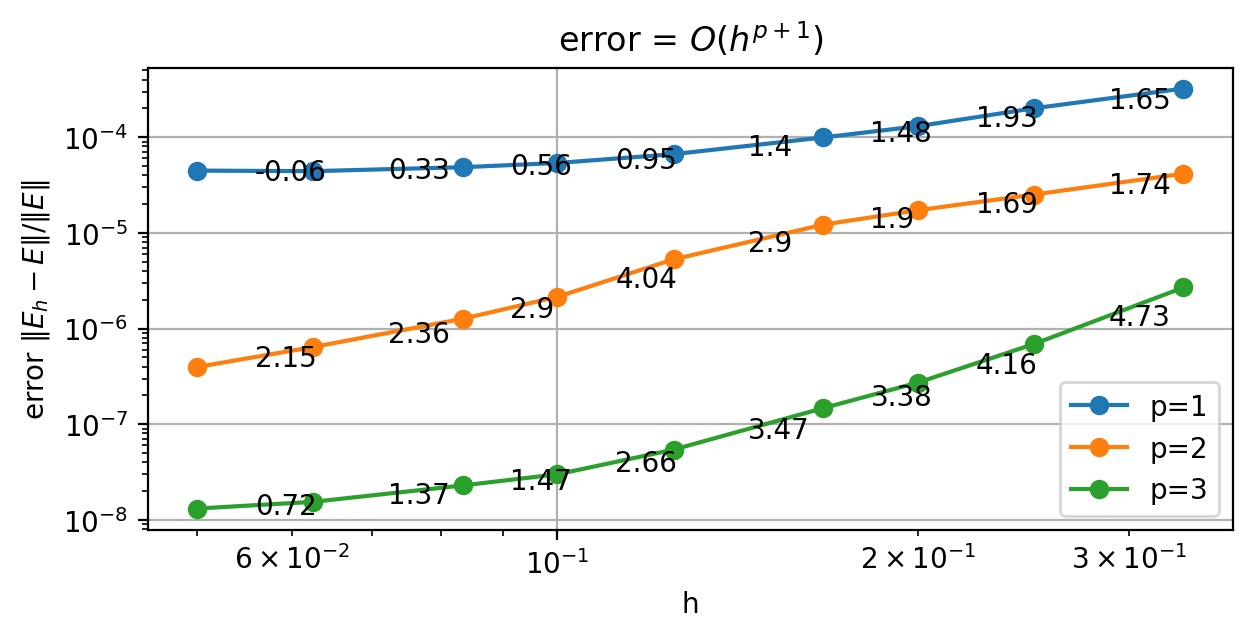

In [32]:
plt.figure(figsize=(7,3),dpi=200)
for p in [1,2,3]:
    NN = [3,4,5,6,8,10,12,16,20]
    err = []
    for N in NN:
        data = np.loadtxt('./Poiseuille/logging_Diric4_%d_%d_1E_3_stdout.txt'%(p,N))[6]
        err.append(data)
        # print(p,N,data)
    h = 1/np.array(NN)
    e = np.array(err)
    o = np.diff(np.log(e))/np.diff(np.log(h))
    print(o)
    plt.loglog(h,e,'o-',label='p=%d'%p)
    for x,y,z in zip((h[:-1]*h[1:])**0.5,(e[:-1]*e[1:])**0.5,o):
        plt.text(x,y*0.8,np.round(z,2))
    plt.xlabel('h')
    plt.ylabel(r'error $\|E_h-E\|/\|E\|$')
plt.legend()
plt.grid()
plt.title(r'error = $O(h^{p+1})$')